<a href="https://colab.research.google.com/github/fabherhe/regressions/blob/main/lineal_simple_pib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning

In [2]:
#don't forget upload the csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

gdp = pd.read_csv("gdp_data.csv", header=2)

In [3]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    266 non-null    object
 1   Country Code    266 non-null    object
 2   Indicator Name  266 non-null    object
 3   Indicator Code  266 non-null    object
 4   1960            133 non-null    object
 5   1961            135 non-null    object
 6   1962            137 non-null    object
 7   1963            137 non-null    object
 8   1964            137 non-null    object
 9   1965            148 non-null    object
 10  1966            151 non-null    object
 11  1967            155 non-null    object
 12  1968            160 non-null    object
 13  1969            160 non-null    object
 14  1970            169 non-null    object
 15  1971            172 non-null    object
 16  1972            172 non-null    object
 17  1973            172 non-null    object
 18  1974      

In [4]:
# Select rows where the "Country Name" column contains "World"
world = gdp.loc[gdp["Country Name"].str.contains("World")]

In [5]:
#print the variable to see the content
world.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
7,Arab World,ARB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,778,076,501,107","2,834,607,141,427","2,876,010,443,892","2,518,700,620,586","2,495,864,756,764","2,584,096,654,452","2,785,878,075,917","2,808,099,764,578","2,496,251,185,652","2,850,421,035,169"
259,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,"1,392,052,952,994","1,448,393,308,163","1,550,299,476,381","1,671,346,856,960","1,829,998,519,951","1,993,586,721,619",...,"75,488,064,175,234","77,607,198,470,256","79,708,812,241,365","75,179,266,270,828","76,465,590,005,079","81,403,977,427,443","86,413,032,779,060","87,652,863,215,993","84,906,814,189,240","96,100,091,004,541"


In [6]:
#borramos primera fila mundo arabe
world = world.drop(world.index[0])

In [7]:
world.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
259,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,"1,392,052,952,994","1,448,393,308,163","1,550,299,476,381","1,671,346,856,960","1,829,998,519,951","1,993,586,721,619",...,"75,488,064,175,234","77,607,198,470,256","79,708,812,241,365","75,179,266,270,828","76,465,590,005,079","81,403,977,427,443","86,413,032,779,060","87,652,863,215,993","84,906,814,189,240","96,100,091,004,541"


In [8]:
# Display the rows of the DataFrame with their indices
world.reset_index(inplace=True)
world.head()

,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,259,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,"1,392,052,952,994","1,448,393,308,163","1,550,299,476,381","1,671,346,856,960","1,829,998,519,951",...,"75,488,064,175,234","77,607,198,470,256","79,708,812,241,365","75,179,266,270,828","76,465,590,005,079","81,403,977,427,443","86,413,032,779,060","87,652,863,215,993","84,906,814,189,240","96,100,091,004,541"


In [9]:
world = world.rename(columns={"Country Name": "Index"})

In [10]:
# Remove the columns 0, 2, 3, and 4 from the DataFrame
world.drop(["index", "Country Code", "Indicator Name", "Indicator Code"], axis=1, inplace=True)

# Display the modified DataFrame
world.head()

,Index,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,World,"1,392,052,952,994","1,448,393,308,163","1,550,299,476,381","1,671,346,856,960","1,829,998,519,951","1,993,586,721,619","2,163,554,603,423","2,302,168,217,687","2,484,824,098,408",...,"75,488,064,175,234","77,607,198,470,256","79,708,812,241,365","75,179,266,270,828","76,465,590,005,079","81,403,977,427,443","86,413,032,779,060","87,652,863,215,993","84,906,814,189,240","96,100,091,004,541"


In [11]:
# transpose
wt = world.transpose()
wt.head()

,0
Index,World
1960,"1,392,052,952,994"
1961,"1,448,393,308,163"
1962,"1,550,299,476,381"
1963,"1,671,346,856,960"


In [12]:
# Eliminar el encabezado del dataframe
header = wt.iloc[0]
df = wt[1:]
# Asignar la primera fila como encabezado
df.columns = header

In [13]:
df.head(5)

Index,World
1960,"1,392,052,952,994"
1961,"1,448,393,308,163"
1962,"1,550,299,476,381"
1963,"1,671,346,856,960"
1964,"1,829,998,519,951"


In [14]:
df.reset_index(inplace=True)

In [15]:
df.head()

Index,index,World
0,1960,"1,392,052,952,994"
1,1961,"1,448,393,308,163"
2,1962,"1,550,299,476,381"
3,1963,"1,671,346,856,960"
4,1964,"1,829,998,519,951"


In [16]:
df.index

RangeIndex(start=0, stop=62, step=1)

In [17]:
df = df.rename(columns={"index": "Year", "World": "GDP (current US$)"})

In [18]:
df.head(5)

Index,Year,GDP (current US$)
0,1960,"1,392,052,952,994"
1,1961,"1,448,393,308,163"
2,1962,"1,550,299,476,381"
3,1963,"1,671,346,856,960"
4,1964,"1,829,998,519,951"


In [19]:
#revisamos que los datos esten listos para correr la regresion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               62 non-null     object
 1   GDP (current US$)  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [20]:
#reemplazamos espacios y comas
df['Year'] = df['Year'].str.replace(',', '')
df['GDP (current US$)'] = df['GDP (current US$)'].str.replace(',', '')
df['Year'] = df['Year'].str.replace(' ', '')
df['GDP (current US$)'] = df['GDP (current US$)'].str.replace(' ', '')

In [21]:
df

Index,Year,GDP (current US$)
0,1960,1392052952994
1,1961,1448393308163
2,1962,1550299476381
3,1963,1671346856960
4,1964,1829998519951
...,...,...
57,2017,81403977427443
58,2018,86413032779060
59,2019,87652863215993
60,2020,84906814189240


In [22]:
#tenemos datos tipo string y los vamos a pasar a valores enteros

# selecciona las columnas "Year" y "GDP" del dataframe original
df_temp = df[["Year", "GDP (current US$)"]]

# convierte las columnas seleccionadas a tipo "int64"
df_temp = df_temp.apply(pd.to_numeric, downcast='integer')

# sobreescribe las columnas originales con los datos convertidos
df[["Year", "GDP (current US$)"]] = df_temp

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Year               62 non-null     int16
 1   GDP (current US$)  62 non-null     int64
dtypes: int16(1), int64(1)
memory usage: 748.0 bytes


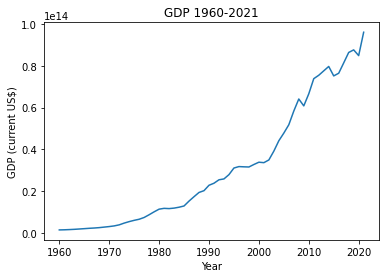

In [24]:
plt.plot(df["Year"], df["GDP (current US$)"])
plt.xlabel("Year")
plt.ylabel("GDP (current US$)")
plt.title("GDP 1960-2021")
plt.show()

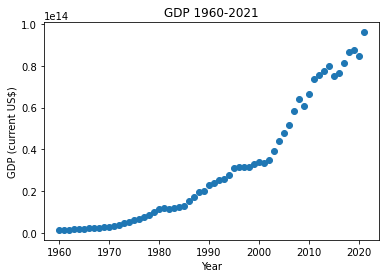

In [25]:
plt.scatter(df["Year"], df["GDP (current US$)"])
plt.xlabel("Year")
plt.ylabel("GDP (current US$)")
plt.title("GDP 1960-2021")
plt.show()

#Here starts the lineal regression

In [26]:
#creacion de variables predictoras y de respuesta, predictores con los valores de la columna año, y de respuesta con los valores de la columna gdp
predictors = df[["Year"]]
response = df[["GDP (current US$)"]]

In [27]:
# Divide los datos en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2)

In [28]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [29]:
# Make predictions on the test data
predictions = model.predict(X_test)

In [30]:
print(type(predictions))

<class 'numpy.ndarray'>


# Visualizaciones derivadas del modelo

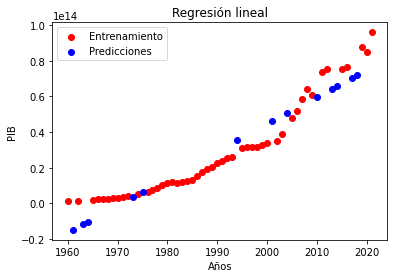

In [31]:
# Grafica los puntos de entrenamiento
plt.scatter(X_train, y_train, label="Entrenamiento", color="red")

#Grafica los puntos de las predicciones
plt.scatter(X_test, predictions, label="Predicciones", color='blue')

# Establece el título y las etiquetas de los ejes
plt.title("Regresión lineal")
plt.xlabel("Años")
plt.ylabel("PIB")

# Muestra la leyenda
plt.legend()

# Muestra la gráfica
plt.show()

# Evaluacion del modelo

In [32]:
#coeficiente de determinación
r2 = model.score(X_test, y_test)
print(f"Coeficiente de determinación: {r2}")

Coeficiente de determinación: 0.8898944527772913


In [33]:
#error absoluto medio
mae = mean_absolute_error(y_test, predictions)
print(f'El error absoluto medio es: {mae}')

El error absoluto medio es: 9990921763895.04


In [34]:
#error cuadrático medio
mse = mean_squared_error(y_test, predictions)
print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 1.235450404222446e+26


In [35]:
#raiz error cuadratico medio
rmse = np.sqrt(mse)
print(f'La raiz del error cuadratico medio es: {rmse}')

La raiz del error cuadratico medio es: 11115081665118.102
